In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#Read CSVs
ride_data = "ride_data.csv"
city_data = "city_data.csv"

ride_df = pd.read_csv(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
#Test to make sure they read in correctly
city_df = pd.read_csv(city_data)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#Merge data and test output again
all_data = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
all_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [5]:
#Create Dataframes for each city type for analysis
urban_df = all_data[all_data["type"]=="Urban"]
suburban_df = all_data[all_data["type"]=="Suburban"]
rural_df = all_data[all_data["type"]=="Rural"]

In [6]:
#Calculate stats for Urban data
urban_drivers = urban_df.groupby(["city"])["driver_count"].mean()
urban_rides = urban_df.groupby(["city"]).count()["ride_id"]
urban_avg = urban_df.groupby(["city"]).mean()["fare"]

urban_stats = pd.DataFrame({"Average Fare ($)": urban_avg,
                            "Total Rides": urban_rides,
                            "Total Number of Drivers": urban_drivers})

urban_stats ["City Type"] = "Urban"
urban_stats.head()                                 

,Average Fare ($),Total Number of Drivers,Total Rides,City Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban
Arnoldview,25.106452,41,31,Urban


In [7]:
#Calculate stats for Suburban data
suburban_drivers = suburban_df.groupby(["city"])["driver_count"].mean()
suburban_rides = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_avg = suburban_df.groupby(["city"]).mean()["fare"]

suburban_stats = pd.DataFrame({"Average Fare ($)": suburban_avg,
                            "Total Rides": suburban_rides,
                            "Total Number of Drivers": suburban_drivers})

suburban_stats ["City Type"] = "Suburban"
suburban_stats.head()

,Average Fare ($),Total Number of Drivers,Total Rides,City Type
city,,,,
Anitamouth,37.315556,16,9,Suburban
Campbellport,33.711333,26,15,Suburban
Carrollbury,36.606000,4,10,Suburban
Clarkstad,31.051667,21,12,Suburban
Conwaymouth,34.591818,18,11,Suburban


In [8]:
#Calculate stats for Rural data
rural_drivers = rural_df.groupby(["city"])["driver_count"].mean()
rural_rides = rural_df.groupby(["city"]).count()["ride_id"]
rural_avg = rural_df.groupby(["city"]).mean()["fare"]

rural_stats = pd.DataFrame({"Average Fare ($)": rural_avg,
                            "Total Rides": rural_rides,
                            "Total Number of Drivers": rural_drivers})

rural_stats ["City Type"] = "Rural"
rural_stats.head()

,Average Fare ($),Total Number of Drivers,Total Rides,City Type
city,,,,
East Leslie,33.660909,9,11,Rural
East Stephen,39.053000,6,10,Rural
East Troybury,33.244286,3,7,Rural
Erikport,30.043750,3,8,Rural
Hernandezshire,32.002222,10,9,Rural


In [9]:
#Bring everything together for use in bubble plot
total_stats = urban_stats
total_stats = total_stats.append(suburban_stats) 
total_stats = total_stats.append(rural_stats) 
total_stats.head()

,Average Fare ($),Total Number of Drivers,Total Rides,City Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban
Arnoldview,25.106452,41,31,Urban


In [10]:
#Calculate percentages of drivers in each city type
total_urban_drivers = urban_df["driver_count"].sum()
total_suburban_drivers = suburban_df["driver_count"].sum()
total_rural_drivers = rural_df["driver_count"].sum()

total_drivers = total_stats["Total Number of Drivers"].sum()

urban_driver_percentage = round(((total_urban_drivers/total_drivers)* 100),1)
suburban_driver_percentage = round(((total_suburban_drivers/total_drivers)* 100),1)
rural_driver_percentage = round(((total_rural_drivers/total_drivers)* 100),1)

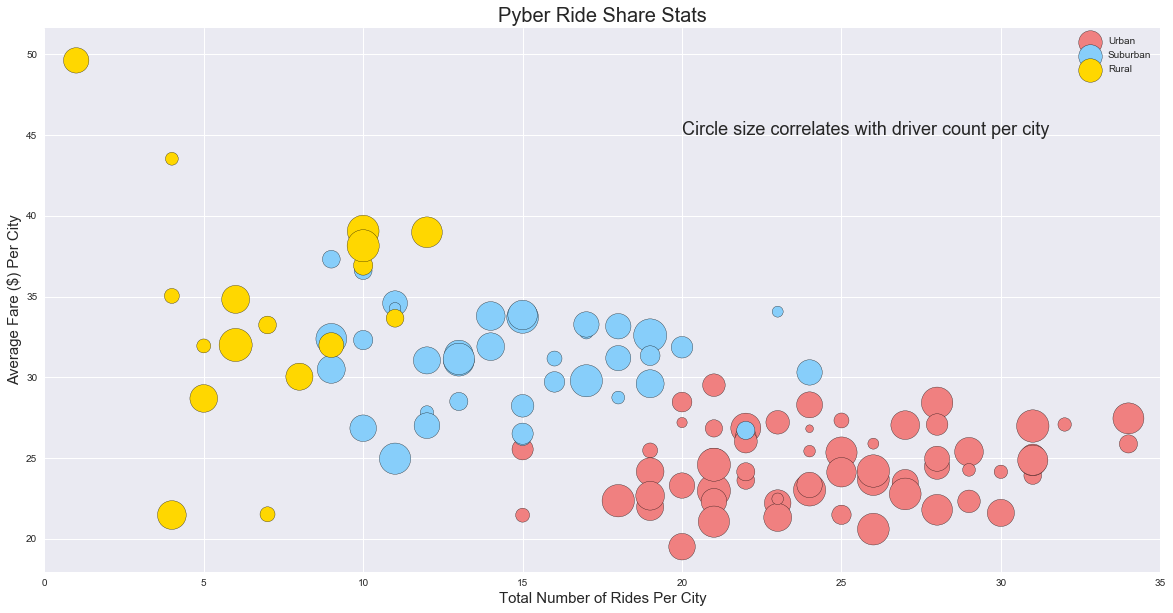

In [11]:
# Create bubble plot using seaborn
sns.set()

main_plot = urban_stats.plot(kind='scatter', x= 'Total Rides', 
                         y= "Average Fare ($)", color = "lightcoral",edgecolors="black", 
                         grid=True,  figsize=(20,10), s=total_stats["Total Number of Drivers"]*15,  
                         legend = True, label = "Urban")
                        

suburban_stats.plot(kind='scatter', x= 'Total Rides', 
                         y= "Average Fare ($)", color = "lightskyblue",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_stats["Total Number of Drivers"]*15,  
                         legend = True, label = "Suburban", ax = main_plot)
                        

rural_stats.plot(kind='scatter', x= 'Total Rides', 
                         y= "Average Fare ($)", color = "gold",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_stats["Total Number of Drivers"]*15,  
                         legend = True, label = "Rural", ax = main_plot)


plt.xlim(0,35)
plt.xlabel('Total Number of Rides Per City', fontsize = 15)
plt.ylabel("Average Fare ($) Per City", fontsize = 15)
plt.title("Pyber Ride Share Stats", fontsize = 20)

plt.annotate(s='Circle size correlates with driver count per city',xy= (0,30), xytext=(20,45), fontsize = 18)

plt.show()

In [39]:
#Make calculations for fare percentage pie chart
urban_total_fare = urban_df["fare"].sum()
suburban_total_fare = suburban_df["fare"].sum()
rural_total_fare = rural_df["fare"].sum()
agg_fare = all_data["fare"].sum()


urban_percentage_fare = round(((urban_total_fare/agg_fare)*100),1)
suburban_percentage_fare = round(((suburban_total_fare/agg_fare)*100),1)
rural_percentage_fare = round(((rural_total_fare/agg_fare)*100),1)

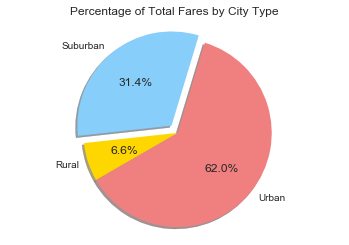

In [43]:
# Create pie chart for Percentage of Total Fares by City Type

labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_percentage_fare, suburban_percentage_fare, rural_percentage_fare]

colors = ["lightcoral", "lightskyblue", "gold"]

#set which piece to explode
explode = (0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=210)

plt.title("Percentage of Total Fares by City Type")

plt.axis("equal")

plt.show()

In [31]:
#make calculations for ride percentage pie chart
urban_rides = urban_df["ride_id"].count()
suburban_rides = suburban_df["ride_id"].count()
rural_rides = rural_df["ride_id"].count()

agg_rides = all_data["ride_id"].count()

urban_ride_percentage = round(((urban_rides/agg_rides)*100))
suburban_ride_percentage = round(((suburban_rides/agg_rides)*100))
rural_ride_percentage = round(((rural_rides/agg_rides)*100))

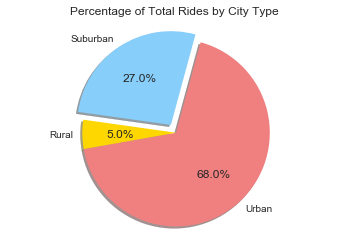

In [44]:
# Create pie chart for Percentage of Total Rides by City Type

labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_ride_percentage, suburban_ride_percentage, rural_ride_percentage]

colors = ["lightcoral", "lightskyblue", "gold"]

#set which piece to explode
explode = (0, 0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=190)


plt.title("Percentage of Total Rides by City Type")


plt.axis("equal")

plt.show()

In [14]:
#make calculations for driver percentage pie chart
total_urban_drivers = urban_df["driver_count"].sum()
total_suburban_drivers = suburban_df["driver_count"].sum()
total_rural_drivers = rural_df["driver_count"].sum()

total_drivers = total_stats["Total Number of Drivers"].sum()

urban_driver_percentage = round(((total_urban_drivers/total_drivers)* 100),1)
suburban_driver_percentage = round(((total_suburban_drivers/total_drivers)* 100),1)
rural_driver_percentage = round(((total_rural_drivers/total_drivers)* 100),1)

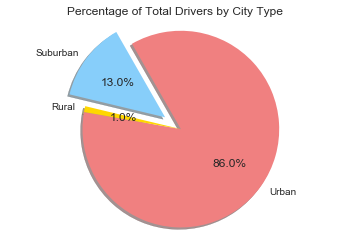

In [37]:
# Create pie chart for Percentage of Total Drivers by City Type

labels = ["Urban", "Suburban", "Rural"]

sizes = [urban_driver_percentage, suburban_driver_percentage, rural_driver_percentage]

colors = ["lightcoral", "lightskyblue", "gold"]

# Set which section(s) to explode out
explode = (0, 0.2, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.title("Percentage of Total Drivers by City Type")

plt.axis("equal")

plt.show()

Observations:

1 - There are 86 times more pyber drivers in urban areas than there are in rural areas

2 - Despite only having 1% of the drivers, the rural pyber fares make up 6% of the fares, indicating that the ride times and/or availability or drivers in rural areas have an effect on fare amount

3 - Overall, assuming that population increases by city type (rural > suburban > urban), average fare decreases as ride frequency increases